In [2]:
import numpy as np

In [37]:
# first, define our problem size
n = 10
alpha = np.random.random((n, 1))
sigma = np.random.random((n, 1))
k = np.random.random((n, n))

# TODO: figure out how to stitch together the r_opt values with the actual stock names
stock_names = [f'stock_{i}' for i in range(n)]

# TODO? figure out how to generate the confidence intervals of how much money you expect to make from this

# Katrina's draft:

max_num_stocks = 5

# DRAFT END

# goal, generate some vector r such that:
# sum(r) = 1.0
# r represents our optimal investment portfolio


In [4]:
# element-wise math

# square every term in alpha
alpha_element_squared = alpha * alpha
sigma_element_squared = sigma * sigma

# the 3.9 formula from
# https://maslov.bioengineering.illinois.edu/optimal_investment_ijtaf.pdf
alpha / (alpha_element_squared + sigma_element_squared)


array([[0.61312732],
       [1.61452763],
       [0.52433935],
       [0.67798864],
       [1.14822909],
       [0.73616259],
       [3.22084696],
       [0.62454444],
       [1.30245263],
       [0.83611897]])

In [5]:
# invert matrices
k_inv = np.linalg.inv(k)

# formula 3.10 from 
# https://maslov.bioengineering.illinois.edu/optimal_investment_ijtaf.pdf
r_opt = np.dot(k_inv, alpha)


In [6]:
# hints that I'm not sure how they all go together

# from formula 3.11
# you know that if \lambda >= \alpha_i, then we can ignore that term

# Maybe if you sort all fo the \alpha_i terms, you can see if a solution for lambda exists where all of the smaller
# values are ignored, and all of the larger values are effected by \lambda

# if you look at each term in the sum of 3.12, they are piecewise linear wrt. \lambda


In [13]:
# idea one to solve this: use line search
# main idea: function 3.12 is monotically decreasing
# so if we pick upper/lower bounds of lambda, we can just do a line search and call it a day
# monotonically decreasing means the derivative of the function wrt lambda is <= 0 across all values of lambda

# upper bound, we know that if lambda causes all of the terms to be zero, we went too far.
# i.e., alpha_i - upper_bound_lambda <= 0 \forall i
upper_bound_lambda = np.max(alpha)

# lower bound, we know that each term in the sum is >= 0 and <= the total sum term.
# so just find the lower bound of each term and take the maximum out of all of these terms
# for each term, lambda = alpha_i - alpha_i^2 - sigma_i^2
# I know this because I can do high-school algebra in my head... work it out on paper if you can't
lower_bound_lambda = np.max(alpha - alpha_element_squared - sigma_element_squared)

print(lower_bound_lambda, upper_bound_lambda)

# now line search/binary search... first we need to evaluate the value of the 3.12 summation expression
def eval_expression(lambda_value):
    # subtract one so I can get something like \sum - 1 = 0 to solve.
    fractional_terms = (alpha - lambda_value) / (alpha_element_squared + sigma_element_squared)
    # heavyside function
    fractional_terms = np.maximum(fractional_terms, 0)
    return np.sum(fractional_terms) - 1

# sanity check, the correct value (0) is between the upper bound and lower bound
eval_expression(lower_bound_lambda), eval_expression(upper_bound_lambda)

# there's a tolerance term usually, more on that later
tolerance = 1e-9

# initialize our loop with our initial guess
lower_lambda = lower_bound_lambda
upper_lambda = upper_bound_lambda
middle_lambda = (lower_bound_lambda + upper_bound_lambda) / 2

iterations = 0
while np.abs(eval_expression(middle_lambda)) > tolerance:
    middle_value = eval_expression(middle_lambda)
    if middle_value > 0:
        lower_lambda = middle_lambda
    else:
        upper_lambda = middle_lambda
    middle_lambda = (lower_lambda + upper_lambda) / 2

    iterations += 1
    print(f'iteration: {iterations}, {middle_lambda}, {eval_expression(middle_lambda)}')


0.13330002768904808 0.9721977629513062
iteration: 1, 0.34302446150461263, 1.8226015331024055
iteration: 2, 0.4478866784123949, 0.7097468549807711
iteration: 3, 0.500317786866286, 0.15331951591995385
iteration: 4, 0.5265333410932316, -0.0913102309169701
iteration: 5, 0.5134255639797588, 0.015603253794847172
iteration: 6, 0.5199794525364951, -0.043259336016430616
iteration: 7, 0.5167025082581269, -0.01382804111079139
iteration: 8, 0.5150640361189429, 0.0008876063420273361
iteration: 9, 0.5158832721885349, -0.0064702173843820265
iteration: 10, 0.5154736541537389, -0.002791305521177234
iteration: 11, 0.515268845136341, -0.0009518495895753931
iteration: 12, 0.5151664406276419, -3.2121623773972985e-05
iteration: 13, 0.5151152383732924, 0.0004277423591267926
iteration: 14, 0.5151408395004672, 0.00019781036767629878
iteration: 15, 0.5151536400640546, 8.284437195049676e-05
iteration: 16, 0.5151600403458483, 2.5361374088372912e-05
iteration: 17, 0.5151632404867451, -3.3801248429110586e-06
iterat

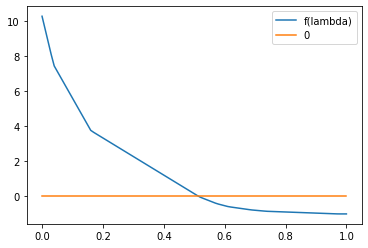

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
plt.plot(x, [eval_expression(el) for el in x], label='f(lambda)')
plt.plot([0, 1], [0, 0], label='0')
plt.legend()

plt.show()


In [31]:
# get the optimal investment portfolio
r_opt = np.maximum(0, (alpha - middle_lambda) / (alpha_element_squared + sigma_element_squared))
r_opt = r_opt.flatten()

# TODO, think about cases where there are zero values in r_opt
r_opt_top_stocks = r_opt[np.argsort(-r_opt)[:max_num_stocks]]
r_opt_top_stocks /= np.sum(r_opt_top_stocks)

In [34]:
r_opt_top_stocks

array([0.32617414, 0.22693462, 0.17060951, 0.14838623, 0.1278955 ])

In [26]:
# sorts things by index
np.argsort(-r_opt.flatten())

array([7, 3, 0, 8, 5, 2, 4, 1, 6, 9])

In [24]:
r_opt

array([[0.15357192],
       [0.        ],
       [0.08564533],
       [0.20427223],
       [0.01421777],
       [0.11512346],
       [0.        ],
       [0.29360138],
       [0.13356792],
       [0.        ]])

In [28]:
r_opt[7], np.max(r_opt)

(array([0.29360138]), 0.29360138030151584)